In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # pip install scipy
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("co2.csv") ;df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
df.sort_values(by = "CO2 Emissions(g/km)", ascending = False)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
5575,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
6640,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
7059,LAMBORGHINI,Aventador Roadster,TWO-SEATER,6.5,12,AM7,Z,26.6,15.8,21.7,13,493
6046,LAMBORGHINI,Aventador Roadster,TWO-SEATER,6.5,12,AM7,Z,26.6,15.8,21.7,13,493
...,...,...,...,...,...,...,...,...,...,...,...,...
6949,HYUNDAI,IONIQ,FULL-SIZE,1.6,4,AM6,X,4.2,4.2,4.2,67,99
5931,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
4900,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
6950,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


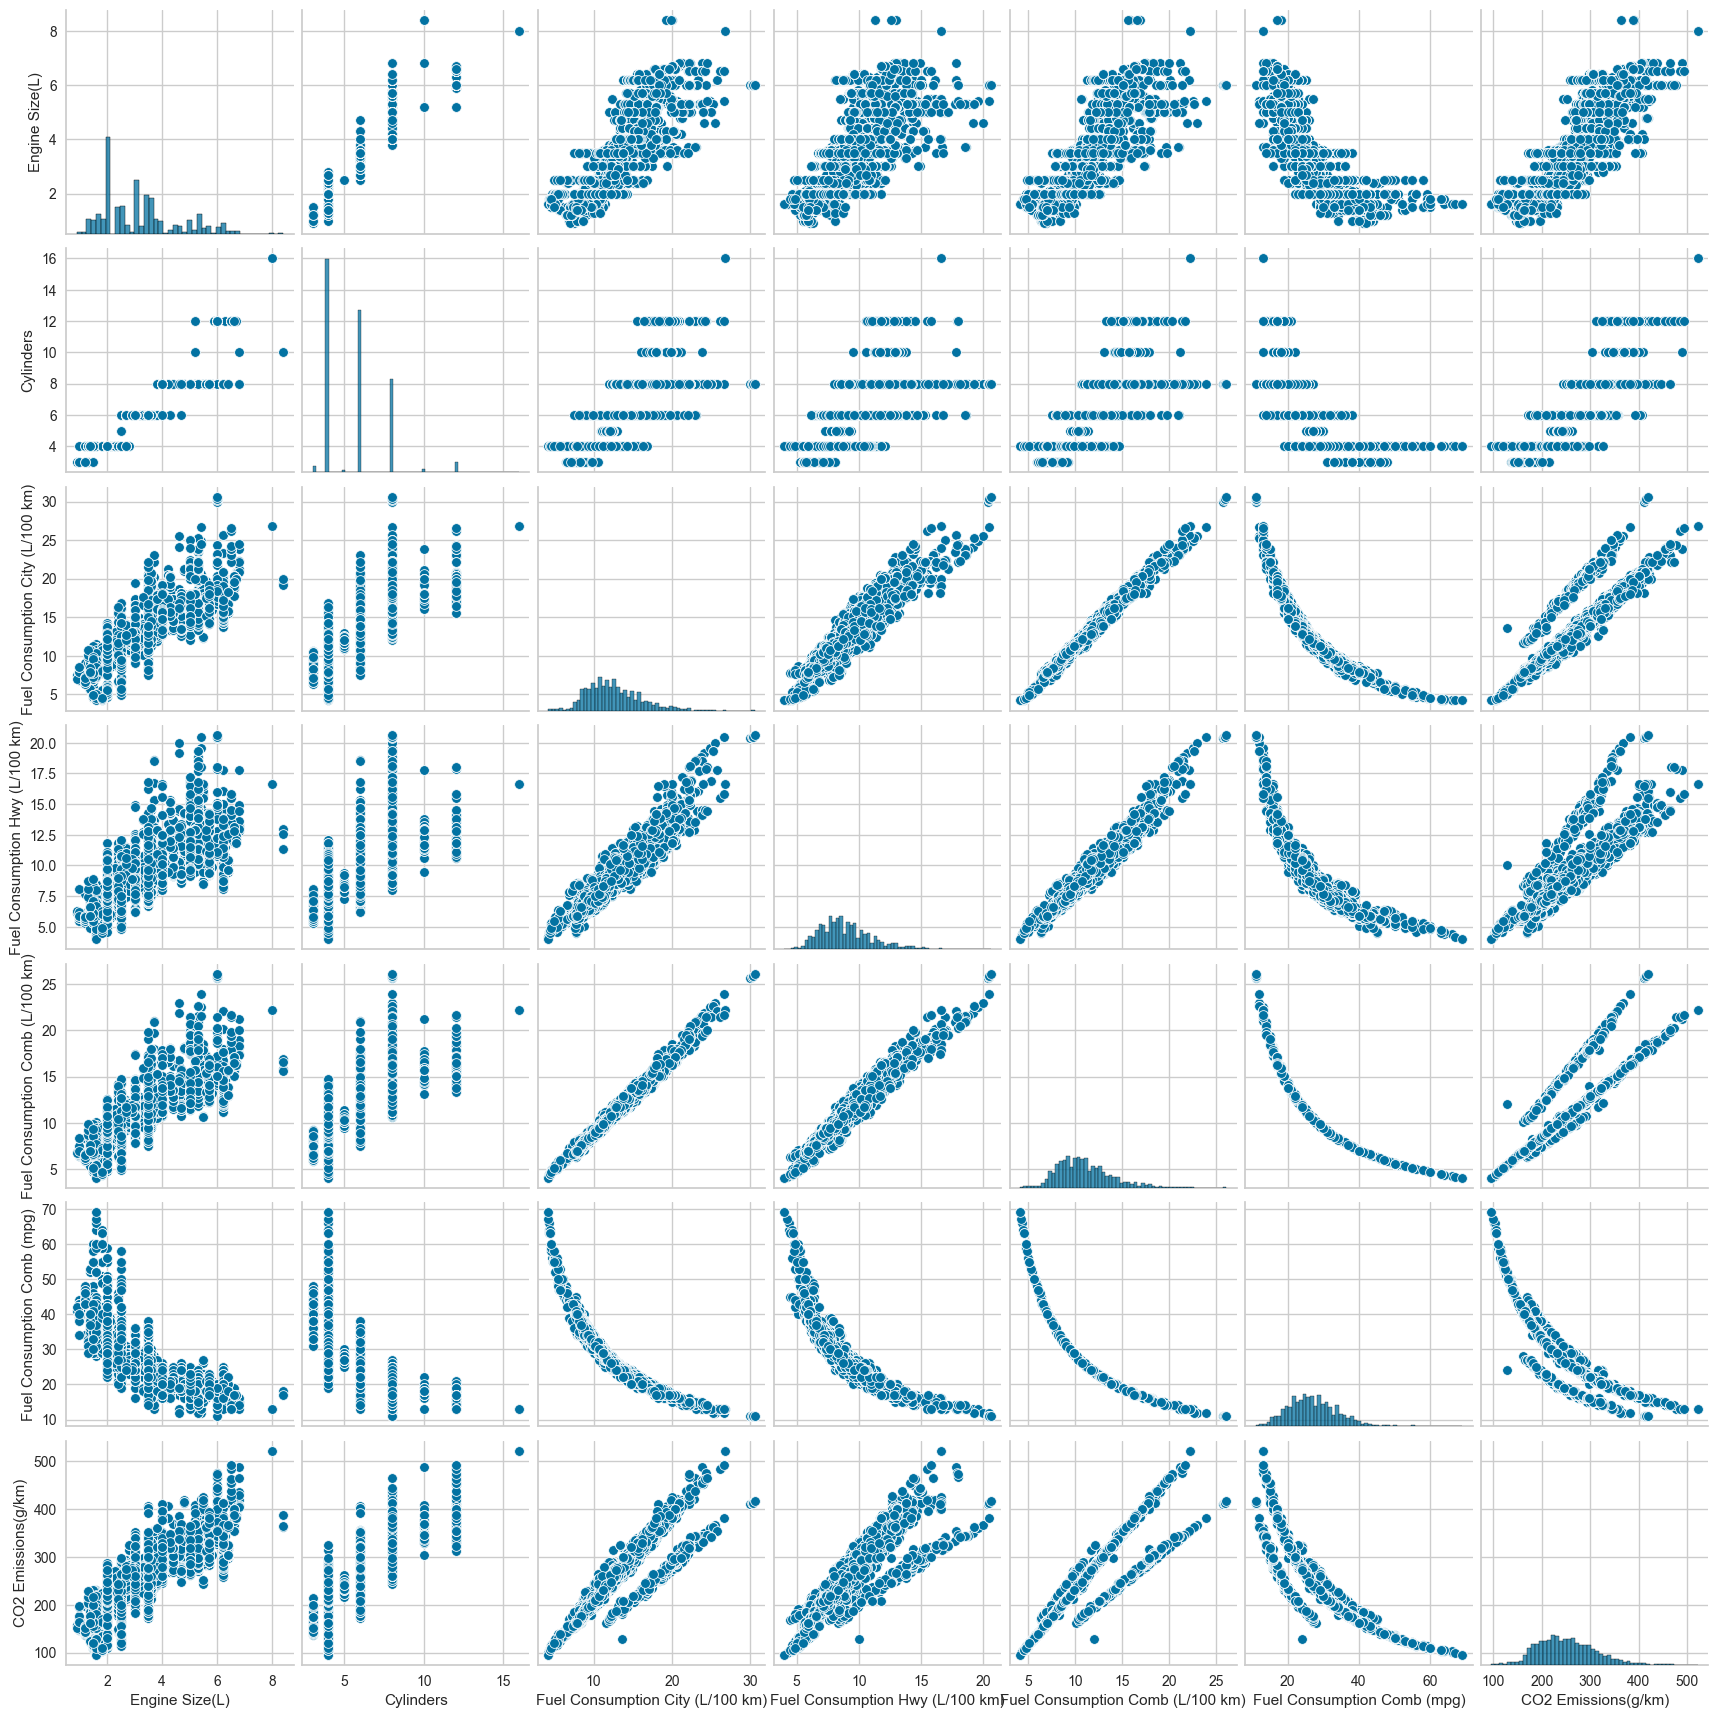

In [6]:
sns.pairplot(df);

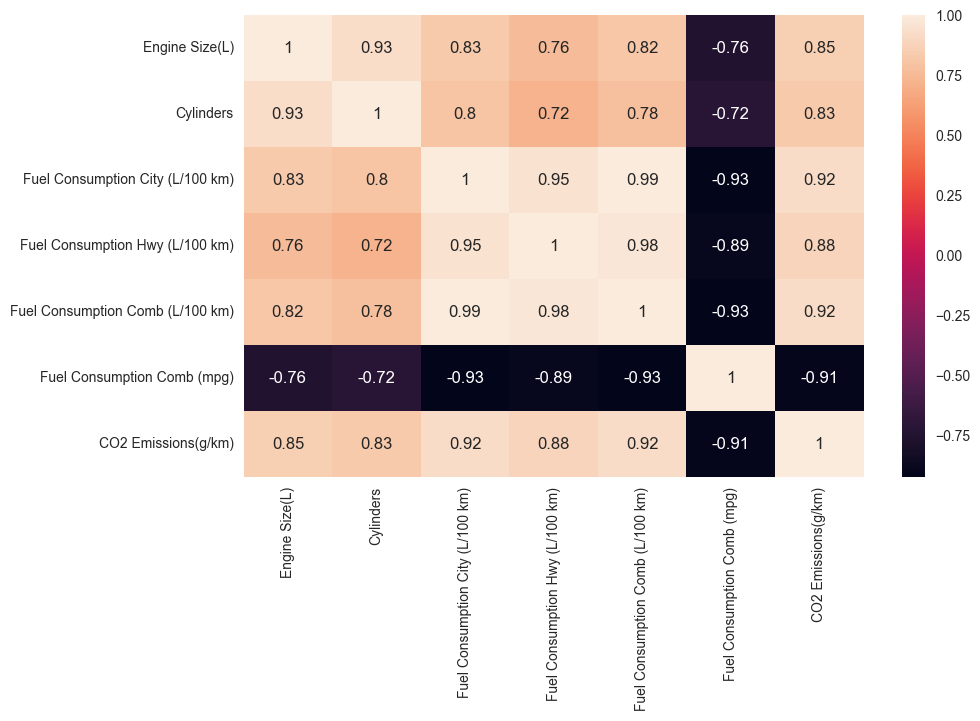

In [7]:
sns.heatmap(df.corr(), annot = True);

In [8]:
for i in df.drop(columns = ["Make","Model","Vehicle Class","Transmission","Fuel Type","CO2 Emissions(g/km)"]).columns:
    print(i, skew(df[i]))

Engine Size(L) 0.8090166237091084
Cylinders 1.1101898640440213
Fuel Consumption City (L/100 km) 0.8088403827811873
Fuel Consumption Hwy (L/100 km) 1.078997475325438
Fuel Consumption Comb (L/100 km) 0.8931342662031229
Fuel Consumption Comb (mpg) 0.9768356000735062


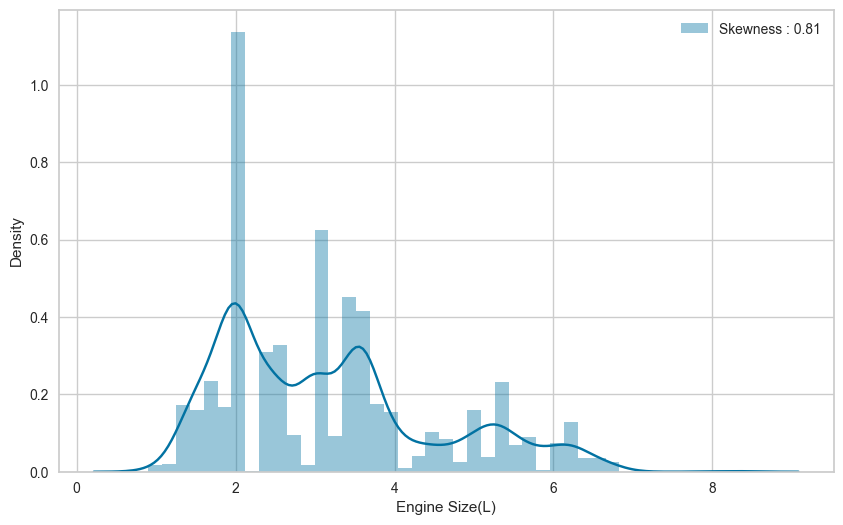

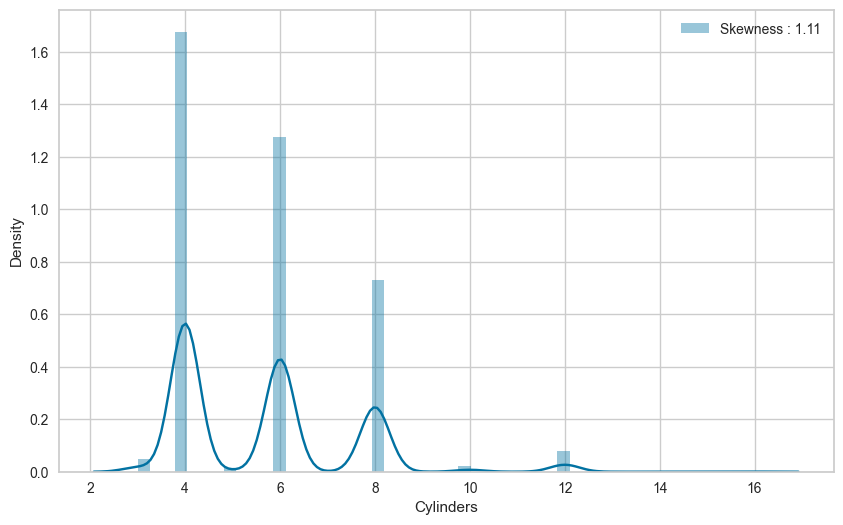

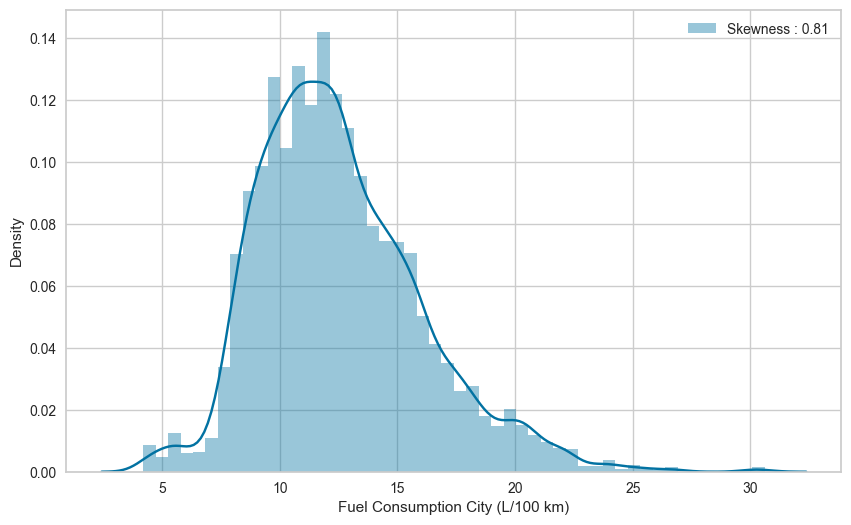

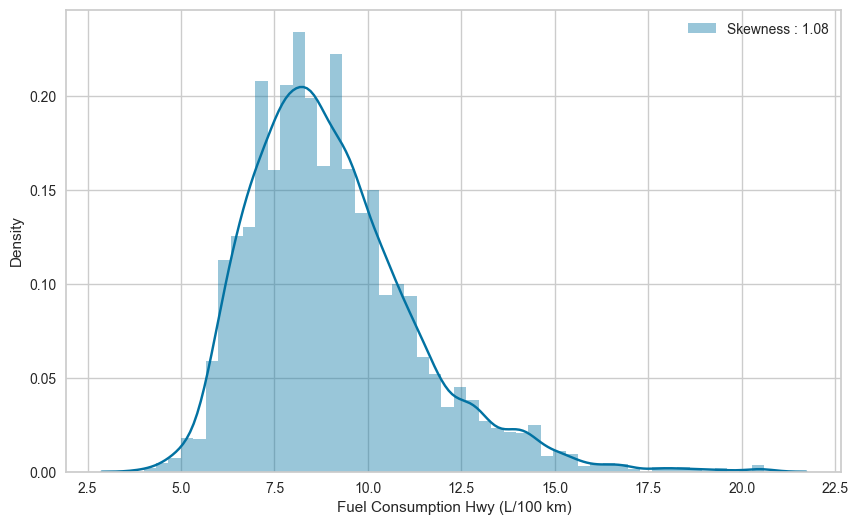

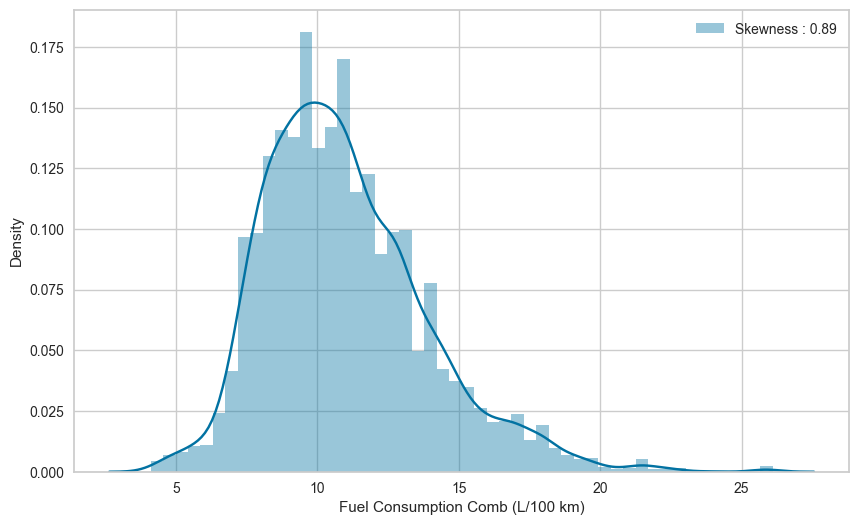

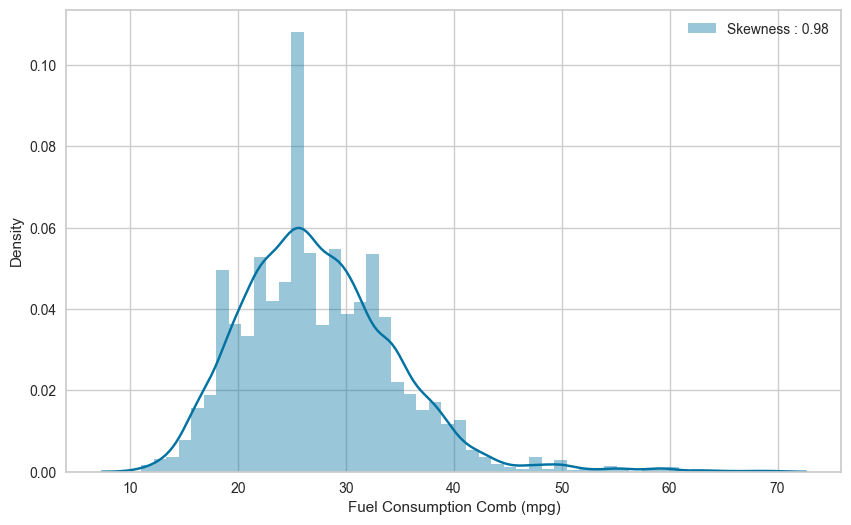

In [9]:
for j in df.drop(columns = ["Make","Model","Vehicle Class","Transmission","Fuel Type","CO2 Emissions(g/km)"]).columns:
    g = sns.distplot(df[j], color = "b", label = "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc = "best")
    plt.show()

In [10]:
df2 = df.drop_duplicates(subset=["Make", "Model"]); df2

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
...,...,...,...,...,...,...,...,...,...,...,...,...
7340,TOYOTA,Highlander Hybrid AWD Limited/Platinum,SUV - STANDARD,2.5,4,AV,X,6.6,6.8,6.7,42,156
7346,TOYOTA,RAV4 AWD TRD Off-Road,SUV - SMALL,2.5,4,AS8,X,9.5,7.5,8.6,33,200
7355,TOYOTA,Tacoma 4WD D-Cab TRD Off-Road/Pro,PICKUP TRUCK - SMALL,3.5,6,M6,X,13.8,11.7,12.9,22,300
7361,VOLKSWAGEN,Atlas Cross Sport 4MOTION,SUV - SMALL,2.0,4,AS8,X,12.8,10.4,11.7,24,273


In [11]:
df2.sort_values(by = "CO2 Emissions(g/km)", ascending = False)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
5575,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
6046,LAMBORGHINI,Aventador Roadster,TWO-SEATER,6.5,12,AM7,Z,26.6,15.8,21.7,13,493
349,FORD,E350 WAGON,VAN - PASSENGER,6.8,10,A5,X,23.9,17.8,21.2,13,488
6045,LAMBORGHINI,Aventador Coupe,TWO-SEATER,6.5,12,AM7,Z,26.3,15.6,21.5,13,487
...,...,...,...,...,...,...,...,...,...,...,...,...
7335,TOYOTA,Corolla Hybrid,COMPACT,1.8,4,AV,X,4.4,4.5,4.5,63,106
6442,TOYOTA,Prius,MID-SIZE,1.8,4,AV,X,4.4,4.6,4.4,64,105
3823,HYUNDAI,IONIQ,FULL-SIZE,1.6,4,AM6,X,4.3,4.4,4.4,64,103
5931,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96


In [12]:
df3 = df2.drop_duplicates(subset=["Make", "Engine Size(L)","Cylinders","Fuel Consumption City (L/100 km)"]); df3

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
...,...,...,...,...,...,...,...,...,...,...,...,...
7331,TOYOTA,Corolla XSE,COMPACT,2.0,4,AV10,X,7.7,6.1,7.0,40,164
7336,TOYOTA,GR Supra,TWO-SEATER,3.0,6,AS8,Z,9.9,7.7,8.9,32,208
7340,TOYOTA,Highlander Hybrid AWD Limited/Platinum,SUV - STANDARD,2.5,4,AV,X,6.6,6.8,6.7,42,156
7361,VOLKSWAGEN,Atlas Cross Sport 4MOTION,SUV - SMALL,2.0,4,AS8,X,12.8,10.4,11.7,24,273


In [13]:
df3.sort_values(by = "CO2 Emissions(g/km)", ascending = False).head(50)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
6046,LAMBORGHINI,Aventador Roadster,TWO-SEATER,6.5,12,AM7,Z,26.6,15.8,21.7,13,493
349,FORD,E350 WAGON,VAN - PASSENGER,6.8,10,A5,X,23.9,17.8,21.2,13,488
6045,LAMBORGHINI,Aventador Coupe,TWO-SEATER,6.5,12,AM7,Z,26.3,15.6,21.5,13,487
2971,MERCEDES-BENZ,AMG G 65,SUV - STANDARD,6.0,12,AS7,Z,24.3,17.9,21.4,13,476
5511,BENTLEY,Mulsanne,MID-SIZE,6.8,8,AS8,Z,24.5,14.4,20.0,14,465
5028,LAMBORGHINI,AVENTADOR S ROADSTER,TWO-SEATER,6.5,12,AM7,Z,24.2,14.5,19.8,14,464
3959,LAMBORGHINI,AVENTADOR COUPE LP 740,TWO-SEATER,6.5,12,AM7,Z,23.9,14.5,19.7,14,461
5027,LAMBORGHINI,AVENTADOR S COUPE,TWO-SEATER,6.5,12,AM7,Z,23.8,14.1,19.4,15,454
1743,LAMBORGHINI,AVENTADOR ROADSTER,TWO-SEATER,6.5,12,AM7,Z,24.0,14.5,19.7,14,453


In [14]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),1328.0,3.219352,1.399691,1.0,2.0,3.0,3.8,8.4
Cylinders,1328.0,5.737199,1.946009,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),1328.0,12.476130,3.461836,4.2,10.1,12.1,14.5,26.8
Fuel Consumption Hwy (L/100 km),1328.0,9.031250,2.092732,4.0,7.6,8.8,10.2,17.9
Fuel Consumption Comb (L/100 km),1328.0,10.924925,2.806423,4.1,9.0,10.6,12.6,22.2
Fuel Consumption Comb (mpg),1328.0,27.655120,7.658107,13.0,22.0,27.0,31.0,69.0
CO2 Emissions(g/km),1328.0,254.731928,64.539704,96.0,209.0,249.0,293.0,522.0


In [15]:
df3.sort_values(by = "Cylinders", ascending = False)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
2971,MERCEDES-BENZ,AMG G 65,SUV - STANDARD,6.0,12,AS7,Z,24.3,17.9,21.4,13,476
1875,MERCEDES-BENZ,S 65 AMG,FULL-SIZE,6.0,12,AS7,Z,18.5,11.8,15.5,18,357
74,BENTLEY,FLYING SPUR,MID-SIZE,6.0,12,AS8,Z,20.3,11.9,16.5,17,388
5477,ASTON MARTIN,Rapide AMR,SUBCOMPACT,6.0,12,A8,Z,16.7,10.9,14.1,20,332
...,...,...,...,...,...,...,...,...,...,...,...,...
4107,MINI,COOPER CLUBMAN ALL4,MID-SIZE,1.5,3,AS8,Z,10.2,7.8,9.1,31,213
1886,MINI,COOPER 3 DOOR,SUBCOMPACT,1.5,3,AS6,Z,8.5,6.3,7.5,38,172
6645,BUICK,Encore GX,SUV - SMALL,1.2,3,AV,X,9.0,7.7,8.4,34,198
6646,BUICK,Encore GX AWD,SUV - SMALL,1.3,3,A9,X,9.0,8.0,8.5,33,199


In [17]:
df3["motor"] = df3["Engine Size(L)"] + df3["Cylinders"]; df3["motor"]

0       6.0
2       5.5
3       9.5
4       9.5
5       9.5
       ... 
7331    6.0
7336    9.0
7340    6.5
7361    6.0
7379    6.0
Name: motor, Length: 1328, dtype: float64

In [18]:
df3.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),motor
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,6.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,5.5
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,9.5
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,9.5
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230,9.5


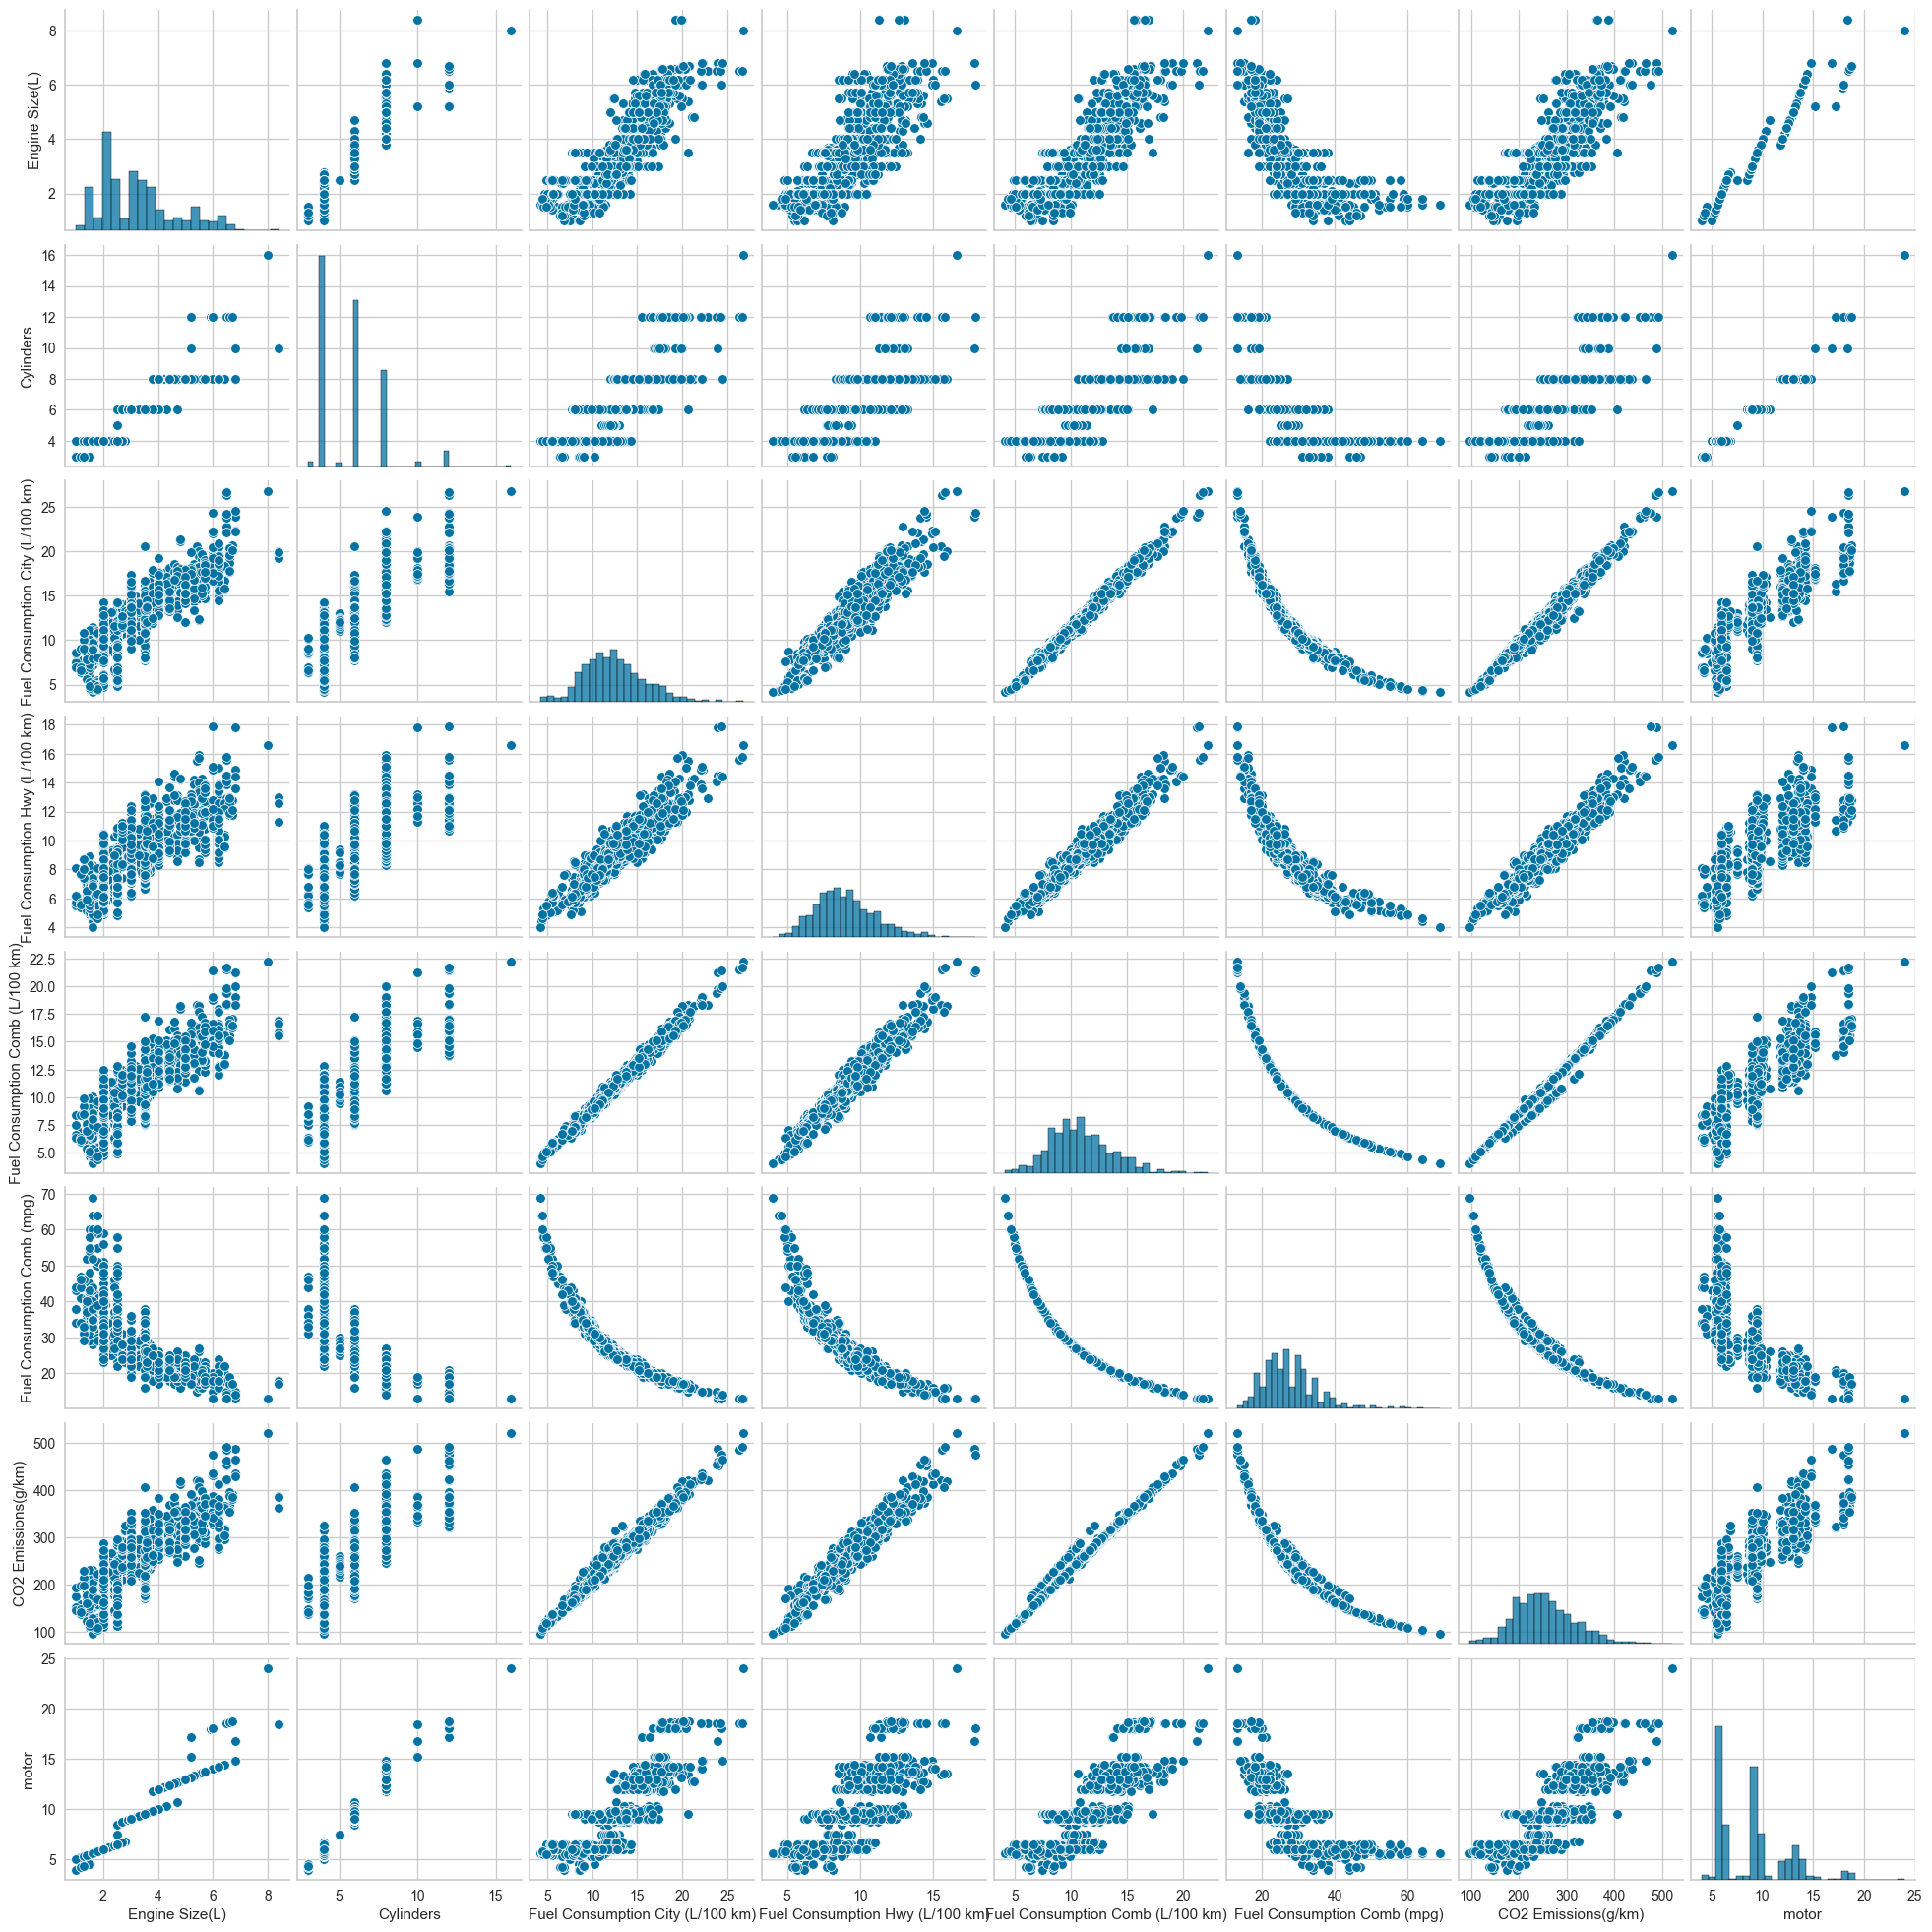

In [19]:
sns.pairplot(df3);

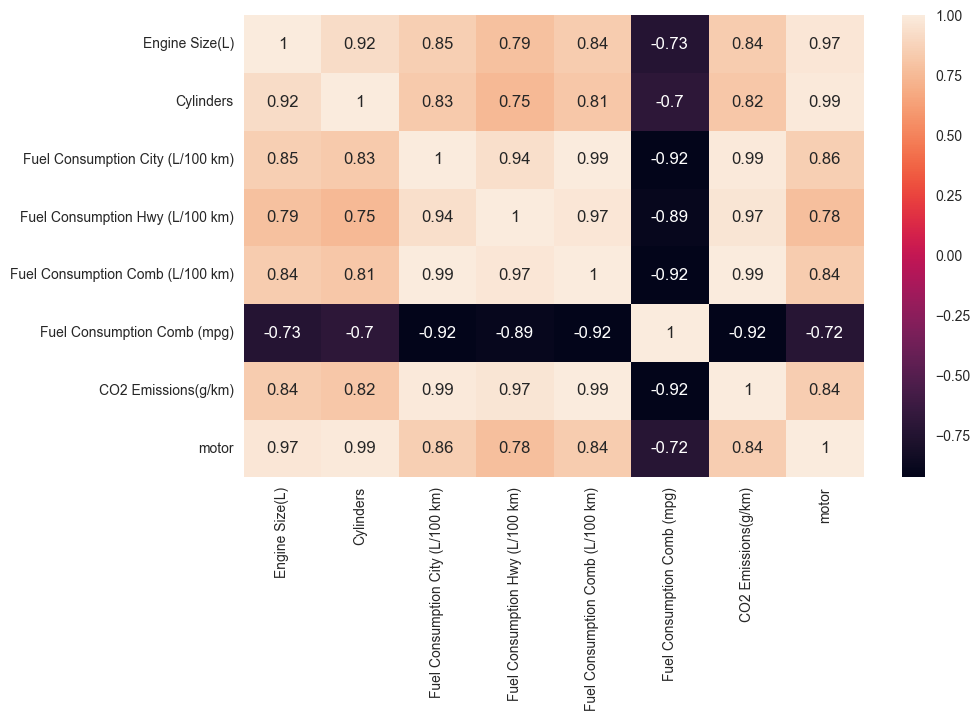

In [20]:
sns.heatmap(df3.corr(), annot = True);

In [25]:
for i in df3.drop(columns = ["Make","Model","Vehicle Class","Engine Size(L)","Cylinders","Transmission","Fuel Type","CO2 Emissions(g/km)","motor"]).columns:
    print(i, skew(df[i]))

Fuel Consumption City (L/100 km) 0.8088403827811873
Fuel Consumption Hwy (L/100 km) 1.078997475325438
Fuel Consumption Comb (L/100 km) 0.8931342662031229
Fuel Consumption Comb (mpg) 0.9768356000735062


In [26]:
df3.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),motor
Engine Size(L),1.000000,0.919119,0.852149,0.787157,0.841837,-0.729441,0.840425,0.972284
Cylinders,0.919119,1.000000,0.829064,0.747868,0.812785,-0.696420,0.815714,0.985759
Fuel Consumption City (L/100 km),0.852149,0.829064,1.000000,0.938823,0.993214,-0.921936,0.988151,0.855733
Fuel Consumption Hwy (L/100 km),0.787157,0.747868,0.938823,1.000000,0.972176,-0.891165,0.967011,0.779806
Fuel Consumption Comb (L/100 km),0.841837,0.812785,0.993214,0.972176,1.000000,-0.924380,0.994682,0.841671
Fuel Consumption Comb (mpg),-0.729441,-0.696420,-0.921936,-0.891165,-0.924380,1.000000,-0.921520,-0.724639
CO2 Emissions(g/km),0.840425,0.815714,0.988151,0.967011,0.994682,-0.921520,1.000000,0.842806
motor,0.972284,0.985759,0.855733,0.779806,0.841671,-0.724639,0.842806,1.000000


In [27]:
X=df3[['motor','Fuel Consumption Comb (L/100 km)']]

y=df3['CO2 Emissions(g/km)']

print(X, y)

      motor  Fuel Consumption Comb (L/100 km)
0       6.0                               8.5
2       5.5                               5.9
3       9.5                              11.1
4       9.5                              10.6
5       9.5                              10.0
...     ...                               ...
7331    6.0                               7.0
7336    9.0                               8.9
7340    6.5                               6.7
7361    6.0                              11.7
7379    6.0                               9.0

[1328 rows x 2 columns] 0       196
2       136
3       255
4       244
5       230
       ... 
7331    164
7336    208
7340    156
7361    273
7379    210
Name: CO2 Emissions(g/km), Length: 1328, dtype: int64


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.16, random_state = 1006)

In [29]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\ny Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (1115, 2)
y Train features shape: (1115,)
X Test features shape : (213, 2)
y Test features shape : (213,)


In [30]:
model = LinearRegression() 

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)
y_pred

array([284.62859394, 221.53543973, 178.59920363, 217.03084317,
       352.3401111 , 367.84986387, 217.03084317, 257.82170758,
       278.09239209, 193.50303903, 203.65962228, 301.61335643,
       223.787738  , 224.85700395, 199.15502573, 192.43377309,
       347.90679894, 256.60303304, 171.98487758, 235.58386237,
       183.10380019, 338.96889022, 244.23663351, 300.46596629,
       208.16421884, 212.6688154 , 399.92351255, 283.4167592 ,
       256.67431744, 201.26475521, 294.92774599, 201.26475521,
       165.22798275, 151.85676186, 212.52624661, 217.03084317,
       243.05360117, 180.85150191, 244.05842252, 280.12399738,
       317.55765537, 201.08654422, 368.42697884, 288.13520895,
       292.63980551, 212.6688154 , 256.38917985, 194.29400719,
       327.42226124, 302.96775995, 234.90666061, 388.19183278,
       278.91216265, 142.70499996, 203.4457691 , 187.89353433,
       232.79693112, 338.61246824, 190.00326382, 142.88321095,
       195.75533731, 455.72513896, 383.47338303, 267.82

In [33]:
model.coef_

array([ 0.35642198, 22.52298279])

In [34]:
X_test.head()

,motor,Fuel Consumption Comb (L/100 km)
103,12.4,12.2
5951,6.0,9.5
790,5.6,7.6
6251,6.0,9.3
901,12.8,15.2


In [35]:
model.intercept_

5.428571323554991

In [36]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [37]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
103,281,284.628594,-3.628594
5951,226,221.535440,4.464560
790,175,178.599204,-3.599204
6251,220,217.030843,2.969157
901,358,352.340111,5.659889
...,...,...,...
5940,297,292.532879,4.467121
947,196,199.012457,-3.012457
736,304,307.258503,-3.258503
547,237,240.623092,-3.623092


In [38]:
sum(X_test.loc[103] * model.coef_) + model.intercept_#manual

284.6285939389071

In [39]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.9898792775114001

In [40]:
mae = mean_absolute_error(y_test, y_pred)
mae

3.678569306584384

In [41]:
mse = mean_squared_error(y_test, y_pred)
mse

45.795864378476395

In [42]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

6.767264172357718

In [43]:
sales_mean = df["CO2 Emissions(g/km)"].mean()
sales_mean

250.58469871360867

In [44]:
mae / sales_mean

0.014679943849199639

In [45]:
rmse / sales_mean

0.027005895440136082

In [46]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [47]:
y_train_pred = model.predict(X_train)

In [50]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9894175859452422
MAE 		: 3.619988847806398
MSE 		: 43.30883768570087
RMSE 		: 6.580945045029694


In [51]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9898792775114001
MAE 		: 3.678569306584384
MSE 		: 45.795864378476395
RMSE 		: 6.767264172357718


In [52]:
residuals = y_test - y_pred

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = y_test, y=residuals)
plt.axhline(y = 0, color = "r", linestyle = "--")
plt.show()

In [ ]:
sns.kdeplot(residuals);

In [ ]:
stats.probplot(residuals, dist = "norm", plot = plt);

In [ ]:
skew(residuals)

In [ ]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

In [ ]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show();  